In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import math

In [2]:
from thinfilm import compute

In [3]:
def foo(nin, nex, layers):
    theta = np.linspace(0, 0.5 * np.pi, 200)
    x = np.zeros((len(theta), 4))

    for i, th in enumerate(theta):
        x[i] = compute(np.cos(th), nin, nex, layers)

    plt.plot(theta, x[:,0], 'r-', theta, x[:,1], 'r--')
    plt.plot(theta, x[:,2], 'b-', theta, x[:,3], 'b--')

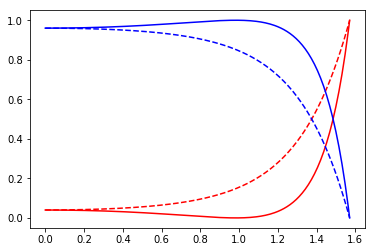

In [9]:
foo(1.0, 1.5, [])

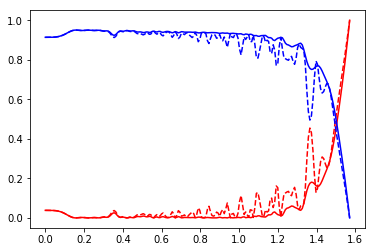

In [15]:
foo(1.0, 1.5, [[1.1+1e-4j, 10], [1.2+1e-4j, 10], [1.3+1e-4j, 10], [1.4+1e-4j, 10]])

In [6]:
compute(0, 1, 1.5, [])

(1.0, 1.0, 0.0, 0.0)

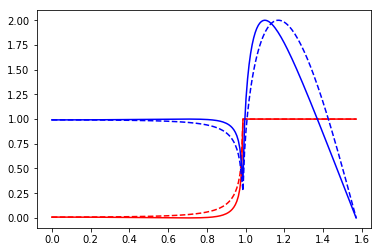

In [7]:
foo(1.2, 1.0, [])